In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import math

In [2]:
# read the data from csv file
data = pd.read_csv("salary.csv")

# let's print the data 
print(data) 


    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5 

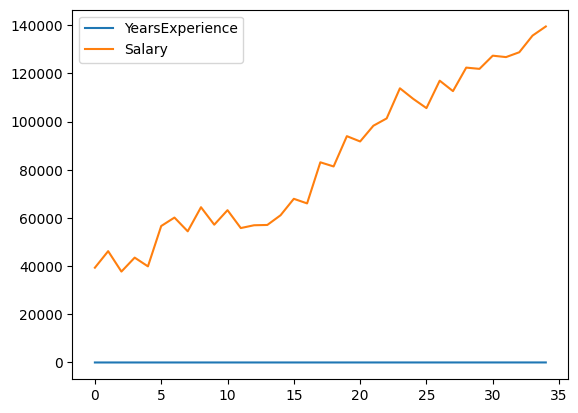

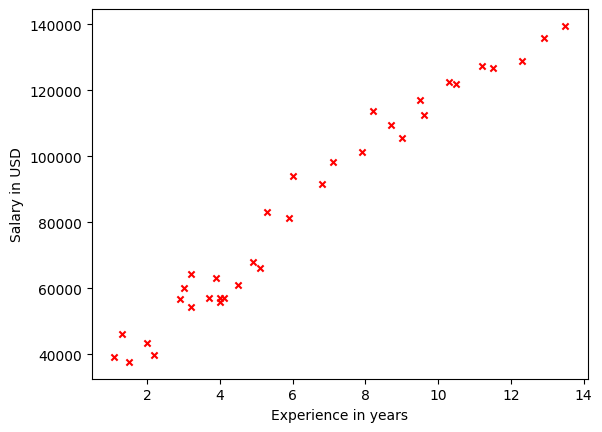

In [3]:
# Visualize the input data 
data = pd.read_csv("salary.csv")

# plot the line graph
data.plot()
# plot points
data.plot.scatter(x="YearsExperience", y="Salary", marker="x", color="r")
plt.xlabel("Experience in years")
plt.ylabel("Salary in USD")
plt.show()


In [4]:
# load data from the csv file to numpy array
def load_data(file_name):
    data = pd.read_csv(file_name)
    x = data["YearsExperience"] 
    x =  np.array(x)
    y = data["Salary"]
    y = np.array(y)
    
    return x, y

In [5]:
x, y = load_data("salary.csv")

In [6]:
# Compute Cost
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Experience in years) 
        y (ndarray): Shape (m,) Label (Salary of employees)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # total number of training examples
    m = x.shape[0]
    # total cost 
    total_cost = 0
    for i in range(m):
        temp = w*x[i] + b
        total_cost+= (temp - y[i])**2
    total_cost = total_cost/(2*m)

    return total_cost

In [7]:
# Compute gradient 
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    # size of training data 
    m = x.shape[0]

    for i in range(m):
        f_wb = x[i]*w + b
        dj_db_i = (f_wb - y[i])
        dj_dw_i = (f_wb -y[i])*x[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db
    
    

In [8]:
# Compute the learning parameters
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    #no. of training examples
    m = x.shape[0]
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # compute gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        # update parameters
        w = w - alpha*dj_dw
        b = b - alpha * dj_db 
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)
            
         # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
    return w, b, J_history, w_history 

In [9]:
initial_w = 0.
initial_b = 0.
iterations = 1000
alpha = 0.01

w, b , _, _ = gradient_descent(x, y, initial_w, initial_b , compute_cost, compute_gradient, alpha, iterations)
print(f"w = {w} and b = {b}")


Iteration    0: Cost 963129946.81   
Iteration  100: Cost 73634353.45   
Iteration  200: Cost 52303727.00   
Iteration  300: Cost 39079064.69   
Iteration  400: Cost 30879976.23   
Iteration  500: Cost 25796666.73   
Iteration  600: Cost 22645092.55   
Iteration  700: Cost 20691164.73   
Iteration  800: Cost 19479759.36   
Iteration  900: Cost 18728706.55   
w = 9034.884772234906 and b = 26349.011879134945


In [10]:
m = x.size
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x[i] + b


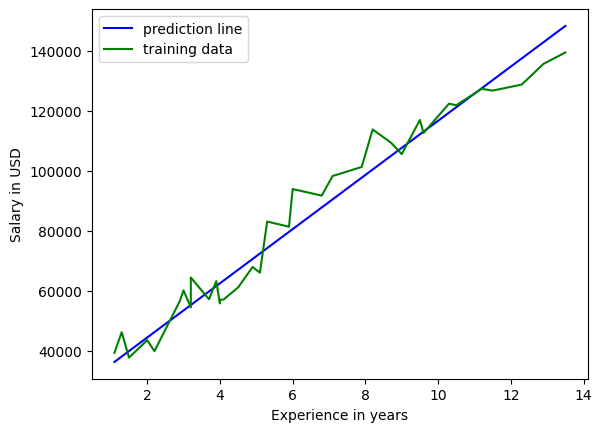

In [11]:
# Plot the linear fit
plt.plot(x, predicted, c = "b")
plt.plot(x, y, c = "g")

# Create a scatter plot of the data. 
# plt.scatter(x, y, marker='x', c='r') 
plt.xlabel("Experience in years")
plt.ylabel("Salary in USD")
plt.legend(['prediction line', 'training data', 'true value'])

For experience = 5.1 years, we predict a salary of $72426.92 and actual salary = $66029.00
Error in prediction = 6397.924217532971 i.e 9.689567034989128%
Accuracy = 90.31


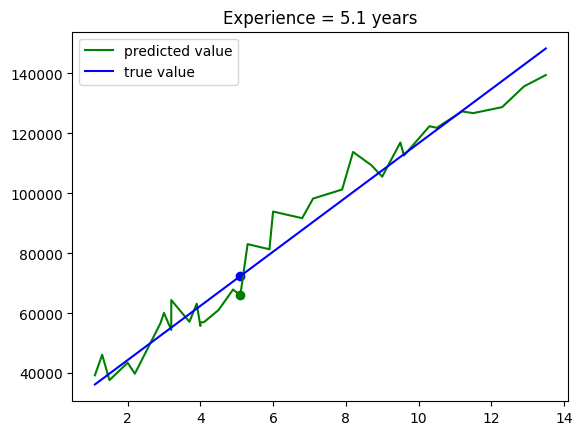

In [12]:
# Let's check the prediction 

predict1 = 5.1 * w + b # for 5.1 years experience
print('For experience = 5.1 years, we predict a salary of $%.2f and actual salary = $%.2f' % (predict1, y[16]))
error = predict1 - y[16]
print(f'Error in prediction = {error} i.e {(error*100)/y[16]}%')
accuracy = 100 - (error*100)/y[16]
print("Accuracy = %.2f" %(accuracy))

plt.title("Experience = 5.1 years")
plt.plot(x, y, c = "g")
plt.plot(x, predicted, c = "b")

plt.scatter(x[16], y[16], c="g")
plt.scatter(5.1, predict1, c="b")

plt.legend(['predicted value', 'true value'])




Average accuracy = 93.26683225087623%


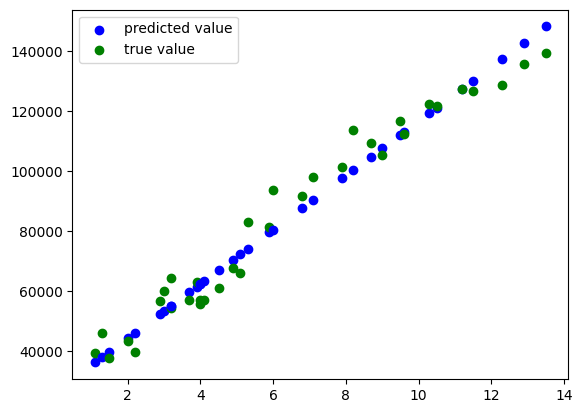

In [13]:
# Let's estimate the average accuracy

m = x.size
error = 0.
for i in range(m):
    prediction = x[i]*w + b
    # plot the data point 
    plt.scatter(x[i], prediction, c="b")
    plt.scatter(x[i], y[i], c= 'g')
    error_i = abs(prediction-y[i])
    error += ((error_i*100)/y[i])
plt.legend(['predicted value', 'true value'])
accuracy = 100 - (error/m)
print(f"Average accuracy = {accuracy}%")



    